# USA

# Scaling had no effect
## Feature importance and grid search had no effect

## grid-search with kfolds improvement

['edoardo de rosa', 'dehang yin']

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../Combine_Data/men/ph_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_ph.csv')
phnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_phnames.csv')
pholymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')

# Base line using ZeroR

In [4]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Initialize  ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions on  test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate  model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9831
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       174
           1       0.00      0.00      0.00         3

    accuracy                           0.98       177
   macro avg       0.49      0.50      0.50       177
weighted avg       0.97      0.98      0.97       177

Confusion Matrix:
[[174   0]
 [  3   0]]


# Model Comparison


In [5]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
# CHANGED RANDOM STATE TO HAVE A LARGER NUMBER OF VALUES IN TEST DF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }

for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 0.9714
F2-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       0.00      0.00      0.00         2

    accuracy                           0.97        70
   macro avg       0.49      0.50      0.49        70
weighted avg       0.94      0.97      0.96        70

Confusion Matrix:
[[68  0]
 [ 2  0]]

Classifier: AdaBoost
Accuracy: 0.9857
F2-Score: 0.5556
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.50      0.67         2

    accuracy                           0.99        70
   macro avg       0.99      0.75      0.83        70
weighted avg       0.99      0.99      0.98        70

Confusion Matrix:
[[68  0]
 [ 1  1]]

Classifier: SVM
Accuracy: 0.9714
F2-Score: 0.0000
Classification Report:
              precision    recall  f

# Grid search for Addaboost - no improvement

In [6]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score

# Assuming 'df' is your DataFrame
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Initialize StratifiedKFold for k-fold cross-validation
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator from grid search
best_clf = grid_search.best_estimator_

# Iterate over folds for evaluation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    print(f"\nFold {fold + 1}")

    # Split the data into training and testing sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model for this fold
    best_clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation data for this fold
    y_pred = best_clf.predict(X_val_fold)

    # Evaluate the model's performance for this fold
    accuracy = accuracy_score(y_val_fold, y_pred)
    report = classification_report(y_val_fold, y_pred)
    conf_matrix = confusion_matrix(y_val_fold, y_pred)
    f2_measure = fbeta_score(y_val_fold, y_pred, beta=2)

    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"F2-Measure: {f2_measure:.4f}")

# Make predictions on the test data
y_pred_test = best_clf.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
f2_measure_test = fbeta_score(y_test, y_pred_test, beta=2)

# Print the results for the test set
print("\nTest Set Results")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Classification Report:\n{report_test}")
print(f"Confusion Matrix:\n{conf_matrix_test}")
print(f"F2-Measure: {f2_measure_test:.4f}")



Fold 1
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00         2

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
[[91  0]
 [ 0  2]]
F2-Measure: 1.0000

Fold 2
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9677
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        91
           1       0.00      0.00      0.00         2

    accuracy                           0.97        93
   macro avg       0.49      0.49      0.49        93
weighted avg       0.96      0.97      0.96        93

Confusion Matrix:
[[90  1]
 [ 2  0]]
F2-Measure: 0.0000

Fold 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.model_selection import train_test_split

data = df.copy()

y = data['medal']
X = data.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator from grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F2-Measure
beta = 2
f2_measure = fbeta_score(y_test, y_pred, beta=beta)

# Print the results
print("AdaBoost Classifier with Grid Search")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F2-Measure: {f2_measure:.4f}")


AdaBoost Classifier with Grid Search
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.9857
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.50      0.67         2

    accuracy                           0.99        70
   macro avg       0.99      0.75      0.83        70
weighted avg       0.99      0.99      0.98        70

Confusion Matrix:
[[68  0]
 [ 1  1]]
F2-Measure: 0.5556


# Feature Importance

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Rank: 0.2000
D: 0.1400
E: 0.0600
ND: 0.0000
Total: 0.1200
year: 0.0200
Name: 0.3600
Nation: 0.0800
round_final: 0.0200
round_qual: 0.0000


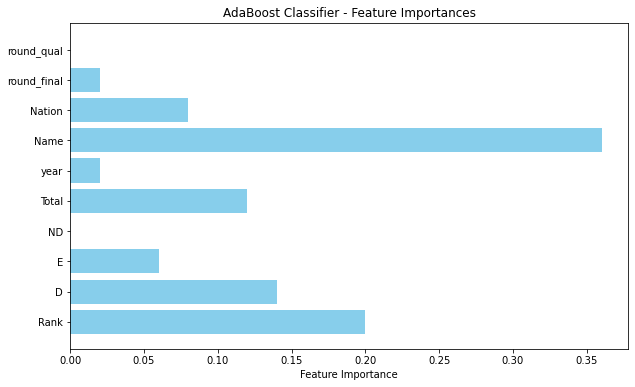

In [8]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


# Final Model

In [7]:
data = df.copy()

y = data['medal']
X = data.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F2-Measure
beta = 2
f2_measure = fbeta_score(y_test, y_pred, beta=beta)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F2-Measure: {f2_measure:.4f}")


AdaBoost Classifier
Accuracy: 0.9857
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.50      0.67         2

    accuracy                           0.99        70
   macro avg       0.99      0.75      0.83        70
weighted avg       0.99      0.99      0.98        70

Confusion Matrix:
[[68  0]
 [ 1  1]]
F2-Measure: 0.5556


# Model Trained earlier, now using 2023/2022 data

In [8]:
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_ph.csv')


In [9]:
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 
                          'round_TeamQual'])

In [23]:
# y_predz = clf.predict(olymp)
# grid-search with kfolds
y_predz= best_clf.predict(olymp)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ypredz


In [11]:
ypreds  = pd.Series(y_predz)
olymp['ypredz']=ypreds

In [12]:
olymp['ypredz'].value_counts()


ypredz
0    2555
1       3
Name: count, dtype: int64

In [13]:
filtered_df = olymp[olymp['ypredz'] == 1]

In [14]:
filtered_df['Name'].unique()

array([185, 163])

# phnames used to match encoded names with actual names

In [15]:
name_encoded_values = [185, 163]

# Filter the DataFrame to get the corresponding "Name" values
result = phnames.loc[phnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [16]:
result.unique()

array(['edoardo de rosa', 'dehang yin'], dtype=object)

# pholymp used to get country info from name list above

In [17]:
pholymp["Name"]=pholymp["Name"].str.lower()

In [18]:
names_to_filter = ['edoardo de rosa', 'dehang yin']

# Filter the DataFrame to get rows with the specified "Name" values
result = pholymp[pholymp['Name'].isin(names_to_filter)]

In [19]:
result['Country'].value_counts()

Country
CHN    17
ITA    16
Name: count, dtype: int64

# Find names from USA

In [20]:
usas=result[result['Country']=='USA']

In [21]:
usas['Name'].unique()

array([], dtype=object)